In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
device

'cuda'

In [3]:
!nvidia-smi

Fri Aug  8 18:34:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.88                 Driver Version: 576.88         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   56C    P3              7W /   60W |     854MiB /   4096MiB |     14%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
image_path = "data"

### Transforms ke 512 sesuai paper


In [5]:
from torchvision import transforms

IMG_SIZE = 512

transform = transforms.Compose([
  transforms.Resize((IMG_SIZE, IMG_SIZE)),
  transforms.ToTensor(),
])

### Buat dataloader


In [6]:
from torchvision import datasets
from torch.utils.data import DataLoader

data = datasets.ImageFolder(image_path,
                            transform=transform)
dataloader = DataLoader(data,
                        batch_size=2,
                        shuffle=True,
                        num_workers=0,
                        pin_memory=True)

data

Dataset ImageFolder
    Number of datapoints: 2
    Root location: data
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [7]:
len(dataloader)

1

In [8]:
image_batch, label_batch = next(iter(dataloader))

image, label = image_batch, label_batch

image.shape, label

(torch.Size([2, 3, 512, 512]), tensor([0, 0]))

### tampilke gambar


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

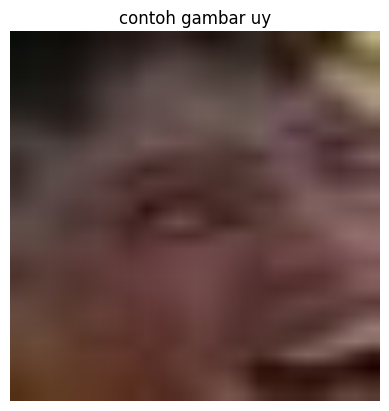

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image[1].permute(1,2,0))
plt.title("contoh gambar uy")
plt.axis(False)